<a target="_blank" href="https://colab.research.google.com/github/alejandrogtz/cccs630-fall2023/blob/main/module02/cellular_automata.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Cellular Automata

## Introduction

In this module, we will explore cellular automata in more detail. As reviewed previously in the course, a cellular automaton is a collection of coloured cells on a grid of specified shape that evolves through a number of discrete time steps according to a set of rules based on the states of neighbouring cells (https://mathworld.wolfram.com/CellularAutomaton.html).

Although these models look simple and easy to understand at first sight, once we study them, we will realize they have the capacity to generate very complex patterns under certain conditions.

In preparation for the interaction part, please review the following video that shows amazing patterns and behaviours that are possible to generate using Conway's Game of Life, the cellular automata we will review this week. Consider opening the video on YouTube and watching it in full-screen mode to appreciate the details of the automata.

In [1]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/-FaqC4h5Ftg?si=042u3_rc6W5IrvUK" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

## Concepts

Below, you will find a list of important concepts we will review in the module.

- Cellular automata
- Conway's Game of Life
- Deterministic models
- Discrete time
- Initial conditions
- States

## Interaction

### Cellular Automata

In this interaction, we will study the cellular automaton named the Game of Life, but before that, let's review the main features and characteristics of a cellular automaton:

- Discrete Grid: A cellular automaton consists of a grid of cells. The grid can be of any finite dimension, though the most common are one-dimensional (a line of cells, like Wolfram's automata) and two-dimensional (similar to a matrix or a chessboard).
- States: Each cell in the grid can be in one of a finite number of states, typically two (e.g., "on" or "off", "alive" or "dead").
- Initial Conditions: The system starts with an initial set of conditions where each cell is set to one of the states.
- Local Rules: The state of a cell at the next time step is determined by its current state, the state of its neighbouring cells, and a set of local rules.
- Time Evolution: As time progresses, these rules are applied iteratively to produce successive generations or states of the system.
- Deterministic: No randomness is involved in the process of updating the states. The next state of a cell is only determined by its current state and the state of its neighbours.

### Conway's Game of Life 

Conway's Game of Life is a cellular automaton created by the British mathematician John Horton Conway in 1970. 

Conway's Game of Life is not a game in the traditional sense; it is a zero-player game. A human doesn't control the actions and decisions in the game. The evolution of the game is determined by an initial state and a set of simple rules. It doesn't require any further input from human players. 

The game uses a two-dimensional (2D) grid of square cells, each of which is in one of two possible states:

- Alive (1 or on)
- Dead (0 or off)

Each cell defines its next state based on its eight neighbours, which are the cells that are horizontally, vertically, or diagonally adjacent and follows four simple rules: 

 - Rule 1: If it is alive and has fewer than two live neighbours, it dies due to underpopulation or loneliness.
 - Rule 2: If it is alive and has two or three live neighbours, it lives.
 - Rule 3: If it is alive and has more than three live neighbours, it dies due to overpopulation.
 - Rule 4: If it is dead and has three live neighbours, it becomes alive due to reproduction.

So, this cellular automaton is a little more sophisticated because it functions in a two-dimensional grid, and the next state of each cell is determined based on more adjacent cells, not just the ones in the preceding row, like in Wolfram's automata.

Conway's game of life produces the following main behaviours:

- Still life: Patterns that don't change from one generation to the next (e.g., the Block and the Boat)
- Oscillators: Patterns that cycle back to their initial state after a fixed number of generations. The simplest oscillator is the Blinker.
- Spaceships: Patterns that move across the grid. The most famous is the Glider, which moves diagonally across the grid.
- Guns: Patterns that produce other patterns periodically (e.g., Gosper glider gun).
- Complex structures: Initial configurations that can evolve for hundreds of generations before stabilizing.

### Instructions

- Select or define the initial conditions.
- Run the game.
- Analyze the patterns generated by the cellular automata. 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc

# Specify the type of animation to be rendered.
rc('animation', html='html5')

In [13]:
# Function to update the grid for each generation.
def update_grid(frame):
    
    # New blank grid. Takes care of rules 1 and 3.
    new_grid = np.zeros((grid_size, grid_size), dtype=int) 
    
    for i in range(grid_size):
        for j in range(grid_size):
            
            # Count the number of neighbors.
            num_neighbors = np.sum(grid[max(0, i - 1):min(i + 2, grid_size),
                                        max(0, j - 1):min(j + 2, grid_size)]) - grid[i, j]
            
            # Apply the rules of the Game of Life.
            if grid[i, j] == 1:
                if num_neighbors == 2 or num_neighbors == 3:
                    # Cell continues living (Rule 2).
                    new_grid[i, j] = 1 
            else:
                if num_neighbors == 3:
                    # Cell becomes alive due to reproduction (Rule 4).
                    new_grid[i, j] = 1 

    # Update the mat variable for the animation.
    mat.set_data(new_grid)
    
    # Update the grid variable.
    grid[:] = new_grid[:]

In [41]:
# Set the size of the grid.
grid_size = 100

# Set the number of generations.
num_generations = 50

In [43]:
# Create an empty grid (Fill with zeros). It resets the grid.
grid = np.zeros((grid_size, grid_size), dtype=int)

In [44]:
""" 
Define the initial state of the grid. Choose one of the following examples or create your own.
"""
# Example 1: Glider gun, one of the most basic dynamic patterns.
grid[10:13, 10:13] = np.array([[0, 1, 0],
                           [0, 0, 1],
                           [1, 1, 1]])

In [183]:
# Example 2: Blinker, smallest and most common oscillator.
grid[10:13, 10:13] = np.array([[0, 0, 0],
                           [1, 1, 1],
                           [0, 0, 0]])

In [156]:
# Example 3: Block, most common still life.
grid[10:13, 10:13] = np.array([[0, 0, 0],
                           [0, 1, 1],
                           [0, 1, 1]])

In [300]:
# Example 4
grid[10:13, 10:13] = np.array([[0, 1, 0],
                           [1, 1, 1],
                           [0, 1, 0]])

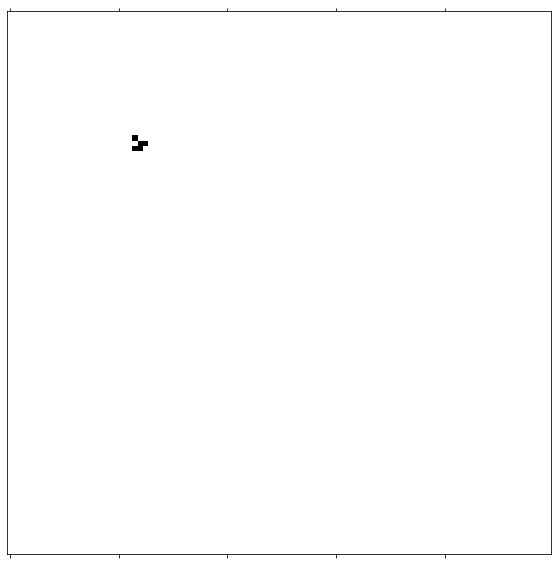

In [52]:
# Display the initial conditions. Show the first grid.

# Create a figure and axis.
fig, ax = plt.subplots(figsize=(10,10))

# Hide the figure's ticks.
ax.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False, labeltop = False)

mat = ax.matshow(grid, cmap='binary')

In [53]:
# Set the animation update function.
ani = animation.FuncAnimation(fig, update_grid, frames=num_generations, interval=500, repeat=False)

In [54]:
# Display the animation.
ani

## Assignment 

### Conceptual Option

Investigate and explain in your own words why the Game of Life is considered to be Turing complete. Include examples, simulations, images, and references that prove this condition. Please submit a 2-3 page Word document with your results.

### Hands-on Option

Configure three new initial conditions with the interaction code provided and simulate them. Identify the behaviours that emerge using the provided classification and document your findings. If necessary, you can increase the variable num_generations to explore if the pattern converges. Creativity is encouraged. Please submit a 1-2 page Word document with your results and your Jupyter notebook with your initial conditions.

## Recommended Readings

Once you have completed the interaction portion of the module, please read the following recommended reading.

- Chapter 2 - Simple Rules, Pages 35 - 45. Tranquillo, J. V. (2019). An introduction to complex systems: Making sense of a changing world. Springer. https://mcgill.on.worldcat.org/oclc/1087498746

## Optional Readings

Below you will find additional resources in case you would like to continue exploring the topics covered in this module.

- Explore a different approach to constructing Conway's game of life.
    - Chapter 6 - Game of Life. Downey, A. (2018). Think complexity: Complexity science and computational modeling (Second). O’Reilly Media. https://mcgill.on.worldcat.org/oclc/1043913738